# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
import time
import datetime
import sys
matplotlib.use('Agg')
import datetime
from datetime import datetime


 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [2]:
def get_data(t):
    r = []                                 #To store data after spliting
    for l in t:
        d= l.split()
        if (len(d) == 15):
            r.append(d)
    return r

In [4]:
from zipfile import ZipFile
data=[]
file="C:\\Users\\umer\\Desktop\\modern data science\\HTWebLog_p1.zip"
with ZipFile(file, 'r') as zipp:
    listofFile = zipp.namelist()
    print('Total files are : ',len(listofFile))
    for f in listofFile:
        df = pd.read_csv(zipp.open(f), delimiter ="\t", skiprows=4,encoding='iso-8859-1',na_values = '-')
        df.columns = ["data"]
        data.extend(df["data"])


Total files are :  120


In [5]:
rows = get_data(data)

In [6]:
#making a dataframe
C_Names=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status'] 
#df_ht = pd.DataFrame(rows, columns = C_Names)
#df_ht.head()
df = pd.DataFrame(rows, columns = C_Names)


In [7]:
df.to_csv('HTWebLogdata.csv',index=False)

In [2]:
#The reaso i have created ths sepeate dataset is because i was facing issues with finding NAN values as any of function was not running on it.
df_ht=pd.read_csv('HTWebLogdata.csv',keep_default_na=False,na_values = '-')

In [5]:
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438806 entries, 0 to 8438805
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   time             datetime64[ns]
 2   s-sitename       object        
 3   s-ip             object        
 4   cs-method        object        
 5   cs-uri-stem      object        
 6   cs-uri-query     object        
 7   s-port           int64         
 8   cs-username      float64       
 9   c-ip             object        
 10  cs(User-Agent)   object        
 11  cs(Referer)      object        
 12  sc-status        int64         
 13  sc-substatus     int64         
 14  sc-win32-status  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(8)
memory usage: 965.7+ MB


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [6]:
#len(df_ht)
#df_ht.size
count_row = df_ht.shape[0]
count_row

8438806

### 1.2 Data Cleaning

In [8]:
def remove_Null_Values(a):
    for col in a:
        totalNull=df_ht[col].isna().sum()
             
        
        if(totalNull):
            print(totalNull, 'NAN values in ',col)
            if(((totalNull/len(df_ht[col])*100))>=0.15):
                df_ht.drop(col, axis=1, inplace=True)
            
        print(col,' has no Null values ')



In [9]:
remove_Null_Values(df_ht.head(0))


date  has no Null values 
time  has no Null values 
s-sitename  has no Null values 
s-ip  has no Null values 
cs-method  has no Null values 
cs-uri-stem  has no Null values 
7886425 NAN values in  cs-uri-query
cs-uri-query  has no Null values 
s-port  has no Null values 
8438806 NAN values in  cs-username
cs-username  has no Null values 
c-ip  has no Null values 
3527 NAN values in  cs(User-Agent)
cs(User-Agent)  has no Null values 
1308918 NAN values in  cs(Referer)
cs(Referer)  has no Null values 
sc-status  has no Null values 
sc-substatus  has no Null values 
sc-win32-status  has no Null values 


#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [18]:
df_ht.head()


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,1900-01-01 00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,2006-11-01,1900-01-01 00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,2006-11-01,1900-01-01 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
3,2006-11-01,1900-01-01 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,2006-11-01,1900-01-01 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [28]:
# eleiminate the rows if they have any NaN value
df_ht.shape[0]
    



8438806

In [11]:
#deleting all the rows containing NAN value
df_ht.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print('the total rows before after removing NaN values are :',len(df_ht))



the total rows before after removing NaN values are : 8435279


In [31]:
for cl in df_ht.head(0):
    s=pd.isna(df_ht[cl]).sum()
    print(cl,' contains ',s,'null values' )

date  contains  0 null values
time  contains  0 null values
s-sitename  contains  0 null values
s-ip  contains  0 null values
cs-method  contains  0 null values
cs-uri-stem  contains  0 null values
s-port  contains  0 null values
c-ip  contains  0 null values
cs(User-Agent)  contains  0 null values
sc-status  contains  0 null values
sc-substatus  contains  0 null values
sc-win32-status  contains  0 null values


## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



In [17]:
#needed to change the  data and time  format
df_ht['time'] = pd.to_datetime(df_ht['time'],format= '%H:%M:%S' )
df_ht['date'] = pd.to_datetime(df_ht['date'], format='%Y-%m-%d')

df_ht.describe(datetime_is_numeric=True)

,date,time,s-port,sc-status,sc-substatus,sc-win32-status
count,8435279,8435279,8435279.0,8.435279e+06,8.435279e+06,8.435279e+06
mean,2006-12-26 21:13:50.393009664,1900-01-01 09:42:41.874171648,80.0,2.300389e+02,1.120651e-03,2.870854e+00
min,2006-11-01 00:00:00,1900-01-01 00:00:00,80.0,2.000000e+02,0.000000e+00,0.000000e+00
25%,2006-11-29 00:00:00,1900-01-01 05:12:26,80.0,2.000000e+02,0.000000e+00,0.000000e+00
50%,2006-12-21 00:00:00,1900-01-01 09:11:31,80.0,2.000000e+02,0.000000e+00,0.000000e+00
75%,2007-01-26 00:00:00,1900-01-01 14:04:53,80.0,3.040000e+02,0.000000e+00,0.000000e+00
max,2007-03-01 00:00:00,1900-01-01 23:59:59,80.0,5.010000e+02,1.400000e+01,1.260000e+03
std,NaN,NaN,0.0,5.077773e+01,1.250622e-01,3.587477e+01


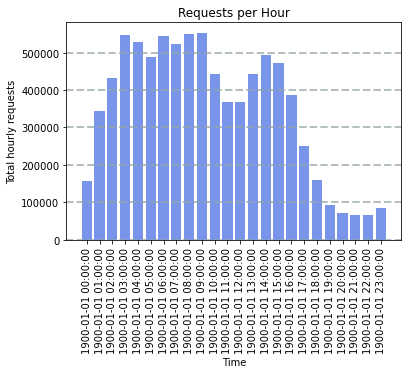

In [31]:
# Create a bar chart of the number of server requests by hour of the day
##filter date from 1st Nov 2006- 28th Feb 2007
Web_Traffic = df_ht[(df_ht['date']>='2006-11-01')&(df_ht['date']<='2007-02-28')]
#Resampling the serer traffic on hourly bases.
Web_Traffic = Web_Traffic.resample('H', on='time').time.count()

x=range(len(Web_Traffic.index))

plt.xticks(x, Web_Traffic.index,rotation=90)

plt.bar(x, Web_Traffic.values,color='royalblue', alpha=0.7)

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Requests per Hour")
plt.xlabel('Time')
plt.ylabel('Total hourly requests')
plt.show()

# Your code


<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


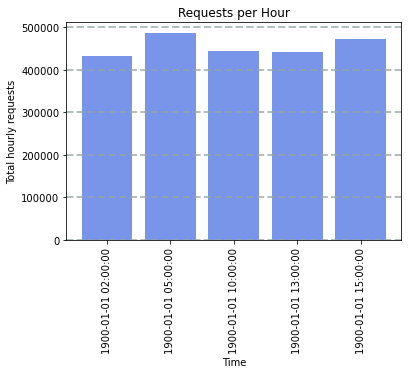

In [39]:
#Your code
hourly_request_amount = Web_Traffic[ (Web_Traffic >= 400000) & (Web_Traffic <= 490000)]

x=range(len(hourly_request_amount.index))

plt.xticks(x, hourly_request_amount.index,rotation=90)

plt.bar(x, hourly_request_amount.values,color='royalblue', alpha=0.7)

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Requests per Hour")
plt.xlabel('Time')
plt.ylabel('Total hourly requests')
plt.show()


In [142]:
print(hourly_request_amount)

time
1900-01-01 02:00:00    432290
1900-01-01 05:00:00    487330
1900-01-01 10:00:00    443519
1900-01-01 13:00:00    442429
1900-01-01 15:00:00    473057
Name: time, dtype: int64


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

In [154]:
server_status=set(df_ht['sc-status'])
server_status

{200, 206, 301, 302, 304, 400, 403, 404, 406, 416, 500, 501}

#### Server Status

the name of servers status are [200, 304, 404, 206, 302, 500, 403, 301, 400, 501, 406, 416]
the total values of Server status are  [6072440, 2136901, 142575, 72472, 7366, 2012, 700, 433, 210, 113, 54, 3]


<function matplotlib.pyplot.show(*, block=None)>

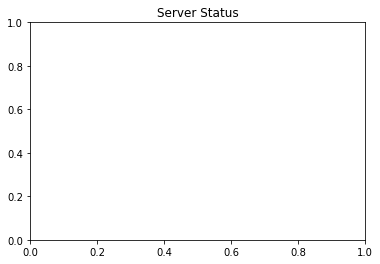

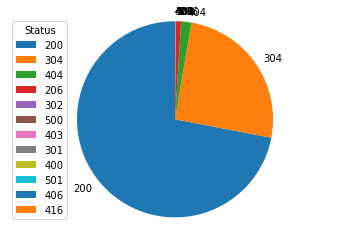

In [155]:
server_status=set(df_ht['sc-status'])
#total =len(set(df_ht['sc-status']))
total=df_ht['sc-status'].value_counts()
print('the name of servers status are',list(total.index))
print("the total values of Server status are ",list(total.values))
y= total.values
label=total.index
plt.title("Server Status")
fig1, ax1 = plt.subplots()
ax1.pie(y,labels=label,startangle=90,radius = 1)
ax1.legend(title= "Status",loc="center left")
ax1.axis('equal') 
plt.show










#Your code

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [35]:
!pip install ip2geotools

  Created wheel for maxminddb: filename=maxminddb-2.0.3-py2.py3-none-any.whl size=15289 sha256=95086926a8fcf44f518dd39e4837a23f678556d9e33258e6a5cdc9776e88e193
  Stored in directory: c:\users\umer\appdata\local\pip\cache\wheels\33\3d\d8\ba39935b88eb6efd147b53e284d391bb7ad159979db3c0f960
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17457 sha256=0b8e4fc31396e6cd142a240e1bb436eb5fa891ffc129497c913ff04c75678fa9
  Stored in directory: c:\users\umer\appdata\local\pip\cache\wheels\6c\32\1d\09f338b837cdbb71f8889b866d50db3e0eaa02b8fc2be4c943
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26312 sha256=e109014fb8362ba3976c790202721891228be4453d4189ca9b899da35b6b71f7
  Stored in directory: c:\users\umer\appdata\local\pip\cache\wheels\5e\5d\01\3083e091b57809dad979ea543def62d9d878950e3e74f0c930
Successfully built maxminddb dicttoxml typing
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
 

In [86]:
from ip2geotools.databases.noncommercial import DbIpCity
df_geoloc = df_ht[(df_ht['date']=='2007-01-01')]
start_time = datetime.strptime('20:00:00', '%H:%M:%S').time()
finish_time = datetime.strptime('20:59:59', '%H:%M:%S').time()
df_geoloc = df_geoloc[(df_geoloc['time'].dt.time >= start_time) & (df_geoloc['time'].dt.time <= finish_time)]
df_geoloc['Country']=df_geoloc.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').country, axis=1)
df_geoloc['City']=df_geoloc.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').city, axis=1)
df_geoloc.info()
#Your code

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 4770371 to 4770584
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             214 non-null    datetime64[ns]
 1   time             214 non-null    datetime64[ns]
 2   s-sitename       214 non-null    object        
 3   s-ip             214 non-null    object        
 4   cs-method        214 non-null    object        
 5   cs-uri-stem      214 non-null    object        
 6   s-port           214 non-null    int64         
 7   c-ip             214 non-null    object        
 8   cs(User-Agent)   214 non-null    object        
 9   sc-status        214 non-null    int64         
 10  sc-substatus     214 non-null    int64         
 11  sc-win32-status  214 non-null    int64         
 12  Country          214 non-null    object        
 13  City             214 non-null    object        
dtypes: datetime64[ns](2), int64(4), 

total Index(['HK', 'CN', 'US', 'IT', 'AU'], dtype='object') [78.97196262 11.68224299  7.47663551  1.40186916  0.46728972]
the top 3 countries are:
 HK    169
CN     25
US     16
Name: Country, dtype: int64


<function matplotlib.pyplot.show(*, block=None)>

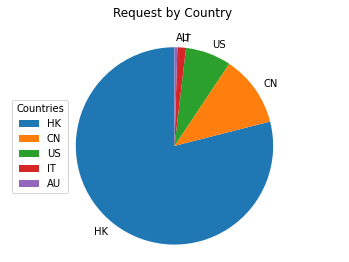

In [161]:
# Create a pie chart of the country values
c=df_geoloc['Country'].value_counts()
total=(c.values/c.sum())*100
print("total",c.index,total)
print("the top 3 countries are:\n",(c)[:3])
label=c.index
fig1, ax1 = plt.subplots()
ax1.pie(y,labels=label,startangle=90,radius = 1)
ax1.legend(title= "Countries",loc="center left")
ax1.axis('equal') 
plt.title("Request by Country \n")

plt.show


In [164]:
print(c)

HK    169
CN     25
US     16
IT      3
AU      1
Name: Country, dtype: int64


#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

the top 3 cites are:
 Ha Kwai Chung    166
Beijing           15
New York          14
Name: City, dtype: int64


<function matplotlib.pyplot.show(*, block=None)>

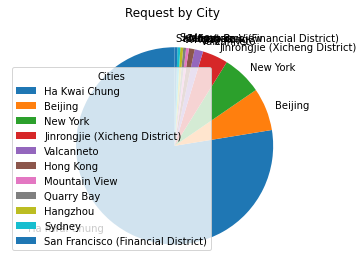

In [115]:
# Create a pie chart of the city values
city=df_geoloc['City'].value_counts()
print("the top 3 cites are:\n",(city)[:3])
y= city.values
label=city.index
fig1, ax1 = plt.subplots()
ax1.pie(y,labels=label,startangle=90,radius = 1)
ax1.legend(title= "Cities",loc=3)
ax1.axis('equal') 
plt.title("Request by City \n")

plt.show



In [163]:
print(city)

Ha Kwai Chung                         166
Beijing                                15
New York                               14
Jinrongjie (Xicheng District)           9
Valcanneto                              3
Hong Kong                               2
Mountain View                           1
Quarry Bay                              1
Hangzhou                                1
Sydney                                  1
San Francisco (Financial District)      1
Name: City, dtype: int64


# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [128]:
# write your import and necessary web crawling libary here
import os
!pip install selenium
!pip install webdriver_manager
from webdriver_manager.chrome import ChromeDriverManager


from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup
chrome_options = webdriver.ChromeOptions()

sys.path.insert(0,"C:\\Users\\umer\\Desktop\\chromedriver.exe")
#sys.path.insert(0,)
#path="C:\Users\umer\anaconda3\Scripts\chromedriver.exe"


### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [148]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name 
path=r"C:\Users\umer\Downloads\chromedriver\chromedriver"
driver=webdriver.Chrome(path)
driver.get('https://www.deakin.edu.au/information-technology/staff-listing')
soup=BeautifulSoup(driver.page_source,'lxml')
divs = soup.find_all('div',class_='module__accordion--wrapper')
arr=[]
for div in divs:
    title=div.find('h3').get_text()
    table_rows=div.find('table').find('tbody').find_all('tr')
    for tr in table_rows:
        dic = dict()
        dic['Name']=parse_name(tr.find('td').get_text())[0]
        dic['Title']=parse_name(tr.find('td').get_text())[1]
        dic['University']='Deakin University'
        arr.append(dic)


def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])

In [150]:
import pandas as pd
# the crawling information will be stored in pandas dataframe and then save as csv
# below you are required to use the parse_name method to crawl the professor's full name and title
# The column name must be same as the provided professor-list.csv
df_crawl=pd.DataFrame(arr)
df_crawl.to_csv('Professor-name-list.csv',index=False)


## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 
<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [ ]:
# search the google scholar for all professors to obtain their citations_all, h-index_all, i10_all, citation_since2016
# h-index-2016 and i10_since2016. Save the results as csv and must having all the professors name, title and all 6 citation information.
# if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na"
# you are requests to use loops and Conditional Statements to finish this task (eg: while / for, if...), failed to use loop
# and conditional statements will occur 0 mark.
# hint: sometimes, to render the google scholar page, you need to wait for the brower for few seconds, you could use "from time import sleep"
# to have sleep(5) as the wait action for waiting 5 seconds.  
# The column name must be same as the provided professor-citation-information.csv 
# write your code for this part as below:



### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [ ]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)
# write your code here



### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [ ]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)
# write your code here

### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [ ]:
# find out all the professors name who has the citations_since2016 > 2500
# write your code here